This file contains the heart disease data

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [9]:
#reads in the data table
original_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data",
                col_names = paste(1:8),
                col_type = c("5" = "d"),
                delim = " ")

#adding an index column to the data frame for future reference
data <- original_data %>%
        mutate(index = as.numeric(rownames(original_data))) %>%
        filter(index <= 2820) #excluding data after the 2820th row, as the data is unusable because there is too much missing data
head(data)

Warning message:
“1102 parsing failures.
row col  expected    actual                                                                                     file
  1  -- 8 columns 7 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 10  5  a double  name      'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 10  -- 8 columns 5 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 11  -- 8 columns 7 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 20  5  a double  name      'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
... ... ......... ......... ........................................................................................
See problems(...) for more details.
”


1,2,3,4,5,6,7,8,index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.0,0,63,1,-9,-9.0,-9,NA,1
-9.0,1,145,1,233,-9.0,50,20,2
1.0,-9,1,2,2,3.0,81,0,3
0.0,0,0,0,1,10.5,6,13,4
150.0,60,190,90,145,85.0,0,0,5
2.3,3,-9,172,0,-9.0,-9,-9,6


In [4]:
#creates an individual data frame for each section of data
section_1 <- data %>%
            filter((index - 1) %% 10 == 0) %>%
            select(-"8") #removing columns that have no values
section_2 <- data %>%
            filter((index - 1) %% 10 == 1) %>%
            mutate(index = index - 1)
section_3 <- data %>%
            filter((index - 1) %% 10 == 2) %>%
            mutate(index = index - 2)
section_4 <- data %>%
            filter((index - 1) %% 10 == 3) %>%
            mutate(index = index - 3)
section_5 <- data %>%
            filter((index - 1) %% 10 == 4) %>%
            mutate(index = index - 4)
section_6 <- data %>%
            filter((index - 1) %% 10 == 5) %>%
            mutate(index = index - 5)
section_7 <- data %>%
            filter((index - 1) %% 10 == 6) %>%
            mutate(index = index - 6)
section_8 <- data %>%
            filter((index - 1) %% 10 == 7) %>%
            mutate(index = index - 7)
section_9 <- data %>%
            filter((index - 1) %% 10 == 8) %>%
            mutate(index = index - 8)
section_10 <- data %>%
            filter((index - 1) %% 10 == 9) %>%
            mutate(index = index - 9) %>%
            select(-"5",-"6",-"7",-"8") #removing columns that have no values

#combines all of the individual data tables into one data table
heart_data_merge <- merge(section_1, section_2, by="index") %>%
            merge(section_3, by = "index") %>%
            merge(section_4, by = "index") %>%
            merge(section_5, by = "index") %>%
            merge(section_6, by = "index") %>%
            merge(section_7, by = "index") %>%
            merge(section_8, by = "index") %>%
            merge(section_9, by = "index") %>%
            merge(section_10, by = "index")

#makes sure the list only contains the index column name
cnames <- c("index")
#numbers the columns 1 to max
for (i in 1:(ncol(heart_data_merge)-1)){
    if (i == 58){
        cnames <- c(cnames, c("diagnosis"))  #renames the 
    } else {
        cnames <- c(cnames, paste("Stat", c(i)))
    }
}

#renames the column names to the appriate ones
colnames(heart_data_merge) <- cnames

#removes the index column
heart_data <- select(heart_data_merge, -index)
head(heart_data_merge)

Warning message in merge.data.frame(., section_4, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’ are duplicated in the result”
Warning message in merge.data.frame(., section_5, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’, ‘8.x’, ‘8.y’ are duplicated in the result”
Warning message in merge.data.frame(., section_6, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’, ‘8.x’, ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘8.y’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’ are duplicated in the result”
Warning message in merge.data.frame(., section_7, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’, ‘8.x’, ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘8.y’, ‘1.y’, ‘2.y’, ‘3

,index,Stat 1,Stat 2,Stat 3,Stat 4,Stat 5,Stat 6,Stat 7,Stat 8,Stat 9,⋯,Stat 66,Stat 67,Stat 68,Stat 69,Stat 70,Stat 71,Stat 72,Stat 73,Stat 74,Stat 75
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,63,1,-9,-9,-9,-9,1,⋯,-9,1,1,1,1,1,1,1,-9,-9
2,11,2,0,67,1,-9,-9,-9,-9,4,⋯,-9,1,1,1,1,1,1,1,-9,-9
3,21,3,0,67,1,-9,-9,-9,-9,4,⋯,-9,2,2,1,1,1,7,3,-9,-9
4,31,4,0,37,1,-9,-9,-9,-9,3,⋯,-9,1,1,1,1,1,1,1,-9,-9
5,41,6,0,41,0,-9,-9,-9,-9,2,⋯,-9,1,1,1,1,1,1,1,-9,-9
6,51,7,0,56,1,-9,-9,-9,-9,2,⋯,-9,1,1,1,1,1,1,1,-9,-9


In [5]:
#creates a data table with only the 14 attributes listed in published experiments
heart_data_attributes <- heart_data %>%
                        select("Stat 3",
                               "Stat 4",
                               "Stat 9",
                               "Stat 10",
                               "Stat 12",
                               "Stat 16",
                               "Stat 19",
                               "Stat 32",
                               "Stat 38",
                               "Stat 40",
                               "Stat 41",
                               "Stat 44",
                               "Stat 51",
                               diagnosis)

#renames the columns
colnames(heart_data_attributes) <- c("age",
                                     "sex",
                                     "cp",
                                     "trestbps",
                                     "chol",
                                     "fbs",
                                     "restecg",
                                     "thalach",
                                     "exang",
                                     "oldpeak",
                                     "slope",
                                     "ca",
                                     "thal",
                                     "num")

head(heart_data_attributes)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


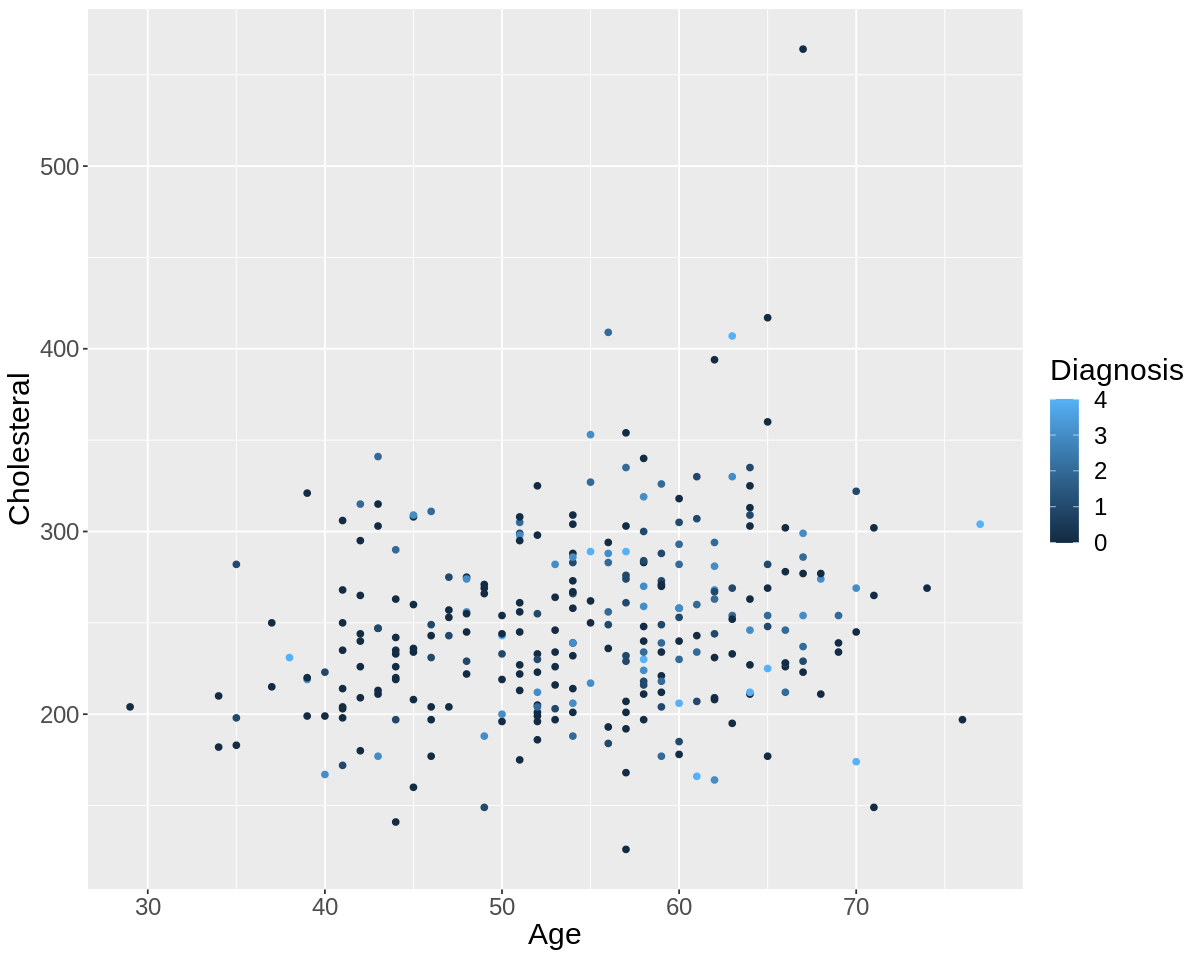

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)

age_vs_chol_plot <- ggplot(heart_data_attributes, aes(x=age, y=chol, colour = num)) +
                    geom_point() +
                    labs(x="Age", y="Cholesteral", colour = "Diagnosis") +
                    theme(text = element_text(size = 18))
age_vs_chol_plot

In [7]:
#creates a table that summarizes the diagnosis data 
heart_data_diagnosis <- heart_data %>%
                    mutate(diagnosis = as_factor(diagnosis)) %>%
                    group_by(diagnosis) %>%
                    summarize(total = n()) %>%
                    mutate(percent = total / nrow(heart_data))
heart_data_diagnosis

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,total,percent
<fct>,<int>,<dbl>
0,157,0.55673759
1,50,0.17730496
2,31,0.10992908
3,32,0.11347518
4,12,0.04255319
